In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import scipy.stats
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import HTML
plt.rcParams['figure.figsize'] = [5, 5]

from ir_dataset import IRDataSet

# Handy function for visualization
def sequence_to_video(sequence):
    frames = []
    fig = plt.figure(figsize=(3.2,2.4))
    for img in sequence:
        frames.append([plt.imshow(img, animated=True)])

    ani = animation.ArtistAnimation(fig, frames, interval=50, blit=True, repeat_delay=1000)
    plt.close()
    return ani.to_html5_video()

def iterator_to_numpy_array(raw):
    return np.array(*[list(raw)])

# Exploring the Data Set
This notebooks shows you how to work with the data set

The `IRDataSet`-Class allows you to import the data from the database

## Getting a sequence

In [2]:
# Import the Data Set
data = IRDataSet()

# Get an iterator
sequence_iterator = data.get_sequences_for_label(label=2, limit=1)
# Only get the first element
first_sequence = next(sequence_iterator)
# Extract the image from the frame tuples (sequence_id, photo_id, capture_time, sensor_id, image)
sample_sequence = [x[4] for x in first_sequence]

# Showtime!
HTML(sequence_to_video(sample_sequence))

In [3]:
# To get a specific sequence you need its id
specific_sequence = data.get_sequence_by_id(20)
f'The sensor ID is {list(specific_sequence)[0][2]}'

'The sensor ID is 42'

## Access the data distribution

In [4]:
# Get all the available labeled sequences with their corresponding labels
sequence_ids = data.get_sequence_ids()
len(list(sequence_ids))

145

array([[ 0, 79],
       [ 1, 34],
       [ 2, 21],
       [ 3,  5],
       [ 4,  6]])

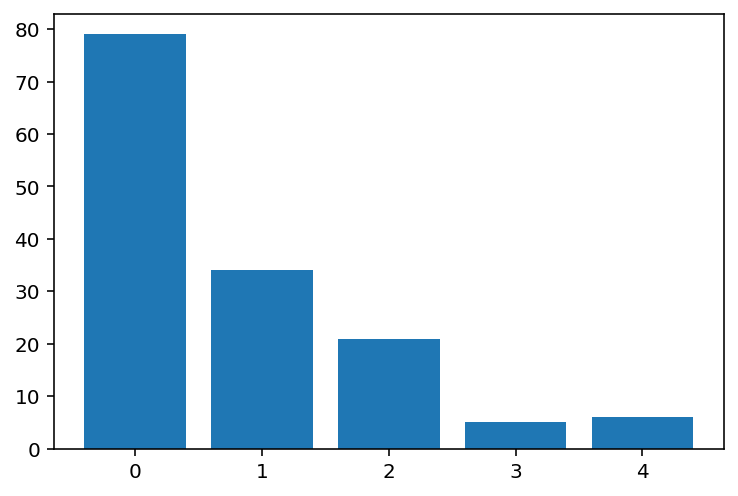

In [5]:
# To calculate class weights you can get the class distribution
distribution_iterator = data.get_sequence_label_occurrences()

# Print distribution for fun
distribution = iterator_to_numpy_array(distribution_iterator)
plt.bar(distribution[...,0], height=distribution[...,1])
distribution